In [1]:
from CPD import datasets, loss, models
from CPD import new_metrics as metrics

%load_ext autoreload
%autoreload

import pytorch_lightning as pl
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
import torch
torch.manual_seed(0)
import random
random.seed(0)
import numpy as np
np.random.seed(0)

# Paramteres initialization 

In [3]:
# input data parameters
SEQ_LEN = 64
IM_SIZE = 28

In [4]:
input_size = IM_SIZE * IM_SIZE
hidden_rnn = 16
rnn_n_layers = 2
linear_dims = [64]
rnn_dropout = 0.5
dropout = 0.25

In [5]:
%load_ext tensorboard 
%tensorboard --logdir logs --port 2021

Reusing TensorBoard on port 2021 (pid 27922), started 1:05:35 ago. (Use '!kill 27922' to kill it.)

# InDiD

In [6]:
base_model_cpd = models.MnistRNN(input_size, hidden_rnn, rnn_n_layers, 
                                 linear_dims, rnn_dropout=0.0, 
                                 dropout=0.5,  rnn_type='LSTM')


cpd_model = models.CPD_model(model=base_model_cpd, T=32,
                             loss_type='CPD', experiment_type='mnist', 
                             lr=0.001, batch_size=64)

In [52]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

experiment_name = 'mnist_cpd'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

early_stop_callback = EarlyStopping(monitor="val_loss", 
                                    min_delta=0.00, patience=5, 
                                    verbose=True, mode="min")

from pytorch_lightning.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    dirpath='saves',
    filename='{epoch}-{val_loss:.2f}-{val_acc:.2f}', 
    every_n_val_epochs=2)

trainer = pl.Trainer(
    max_epochs =100, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1,
    gradient_clip_val=1, # ATTENTION IT'S NEW! I SUPPOSE IT HELPS TO AVOID TRIVIAL SOLUTION
    logger = logger, callbacks = [early_stop_callback, checkpoint_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [53]:
trainer.fit(cpd_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 54.7 K
1 | loss  | CPDLoss  | 0     
-----------------------------------
54.7 K    Trainable params
0         Non-trainable params
54.7 K    Total params
0.219     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 1.438


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.152 >= min_delta = 0.0. New best score: 1.286


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.247 >= min_delta = 0.0. New best score: 1.039


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.300 >= min_delta = 0.0. New best score: 0.740


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.194 >= min_delta = 0.0. New best score: 0.546


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.118 >= min_delta = 0.0. New best score: 0.428


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.126 >= min_delta = 0.0. New best score: 0.302


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.145 >= min_delta = 0.0. New best score: 0.157


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.157 >= min_delta = 0.0. New best score: -0.000


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.209 >= min_delta = 0.0. New best score: -0.209


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.354 >= min_delta = 0.0. New best score: -0.563


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.724 >= min_delta = 0.0. New best score: -1.287


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.066 >= min_delta = 0.0. New best score: -3.353


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 4.202 >= min_delta = 0.0. New best score: -7.555


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 4.528 >= min_delta = 0.0. New best score: -12.083


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 3.191 >= min_delta = 0.0. New best score: -15.275


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.386 >= min_delta = 0.0. New best score: -17.660


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 5.089 >= min_delta = 0.0. New best score: -22.750


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 3.607 >= min_delta = 0.0. New best score: -26.357


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 5.071 >= min_delta = 0.0. New best score: -31.428


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.691 >= min_delta = 0.0. New best score: -33.118


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.897 >= min_delta = 0.0. New best score: -34.016


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.715 >= min_delta = 0.0. New best score: -36.731


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.643 >= min_delta = 0.0. New best score: -37.373


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.662 >= min_delta = 0.0. New best score: -38.036


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.623 >= min_delta = 0.0. New best score: -39.659


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.350 >= min_delta = 0.0. New best score: -40.009


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.428 >= min_delta = 0.0. New best score: -40.437


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.265 >= min_delta = 0.0. New best score: -40.701


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.377 >= min_delta = 0.0. New best score: -41.078


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.377 >= min_delta = 0.0. New best score: -41.455


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.041 >= min_delta = 0.0. New best score: -41.496


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.269 >= min_delta = 0.0. New best score: -41.765


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: -41.770


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: -41.775


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.332 >= min_delta = 0.0. New best score: -42.106


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.205 >= min_delta = 0.0. New best score: -42.312


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.129 >= min_delta = 0.0. New best score: -42.440


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.097 >= min_delta = 0.0. New best score: -42.538


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.066 >= min_delta = 0.0. New best score: -42.604


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.219 >= min_delta = 0.0. New best score: -42.823


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: -42.829


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: -42.829. Signaling Trainer to stop.


# BCE_seq2seq model

In [54]:
base_model_bce = models.MnistRNN(input_size, hidden_rnn, rnn_n_layers, 
                                 linear_dims, rnn_dropout=0.0, 
                                 dropout=0.5,  rnn_type='LSTM')


bce_model = models.CPD_model(model=base_model_bce, T=None,
                             loss_type='BCE', experiment_type='mnist', 
                             lr=0.001, batch_size=64)

In [55]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

experiment_name = 'mnist_bce'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

early_stop_callback = EarlyStopping(monitor="val_loss", 
                                    min_delta=0.00, patience=5, 
                                    verbose=True, mode="min")

from pytorch_lightning.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    dirpath='saves',
    filename='{epoch}-{val_loss:.2f}-{val_acc:.2f}', 
    every_n_val_epochs=2)

trainer = pl.Trainer(
    max_epochs=100, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1,
    gradient_clip_val=1, # ATTENTION IT'S NEW! I SUPPOSE IT HELPS TO AVOID TRIVIAL SOLUTION
    logger = logger, callbacks = [checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [56]:
trainer.fit(bce_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 54.7 K
1 | loss  | BCELoss  | 0     
-----------------------------------
54.7 K    Trainable params
0         Non-trainable params
54.7 K    Total params
0.219     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.642


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.076 >= min_delta = 0.0. New best score: 0.566


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.113 >= min_delta = 0.0. New best score: 0.453


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.110 >= min_delta = 0.0. New best score: 0.343


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.084 >= min_delta = 0.0. New best score: 0.258


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.070 >= min_delta = 0.0. New best score: 0.189


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.049 >= min_delta = 0.0. New best score: 0.140


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.039 >= min_delta = 0.0. New best score: 0.101


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.0. New best score: 0.088


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.014 >= min_delta = 0.0. New best score: 0.075


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 0.066


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.063


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 0.054


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.052


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.050


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.049


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.048


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.048. Signaling Trainer to stop.


# Combined

In [21]:
base_model_comb = models.MnistRNN(input_size, hidden_rnn, rnn_n_layers, 
                                 linear_dims, rnn_dropout=0.0, 
                                 dropout=0.5,  rnn_type='LSTM')

combined_model_1 = models.CPD_model(model=base_model_comb, T=None,
                                    loss_type='BCE', experiment_type='mnist', 
                                    lr=0.001, batch_size=64)

combined_model_2 = models.CPD_model(model=base_model_comb, T=16,
                                    loss_type='CPD', experiment_type='mnist', 
                                    lr=0.001, batch_size=64)

In [22]:
experiment_name = 'mnist_comb'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = EarlyStopping(monitor="val_loss", 
                                    min_delta=0.00, patience=5, 
                                    verbose=True, mode="min")

trainer_1 = pl.Trainer(
    max_epochs=20, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

trainer_2 = pl.Trainer(
    max_epochs=20, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [23]:
trainer_1.fit(combined_model_1)
trainer_2.fit(combined_model_2)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 448 K 
1 | loss  | BCELoss  | 0     
-----------------------------------
448 K     Trainable params
0         Non-trainable params
448 K     Total params
1.793     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.325


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.202 >= min_delta = 0.0. New best score: 0.123


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.062 >= min_delta = 0.0. New best score: 0.062


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.057


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 0.048


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.043


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.043. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 448 K 
1 | loss  | CPDLoss  | 0     
-----------------------------------
448 K     Trainable params
0         Non-trainable params
448 K     Total params
1.793     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 39.488 >= min_delta = 0.0. New best score: -39.445


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.478 >= min_delta = 0.0. New best score: -39.923


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: -39.923. Signaling Trainer to stop.


# Baselines

In [8]:
import ruptures as rpt
l2_model = models.L2Baseline(l2_type="one_by_one", device='cuda')   
zero_model = models.ZeroBaseline(device='cuda')    
binseg_model = models.ClassicBaseline(rpt.Binseg(), n_pred=1, pen=None)
pelt_model = models.ClassicBaseline(rpt.Pelt(), n_pred=None, pen=0)
kernel_model = models.ClassicBaseline(rpt.KernelCPD(kernel="rbf"), n_pred=1)

# Calculate metrics

## Detection curve and Area under detection curve

In [11]:
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

In [ ]:
_, delay_list_cpd, fp_delay_list_cpd = metrics.evaluation_pipeline(cpd_model, cpd_model.val_dataloader(), threshold_list, device='cuda', verbose=True)

In [ ]:
_, delay_list_bce, fp_delay_list_bce = metrics.evaluation_pipeline(bce_model, cpd_model.val_dataloader(), threshold_list, device='cuda', verbose=True)

In [16]:
_, delay_list_comb, fp_delay_list_comb = metrics.evaluation_pipeline(combined_model_2, cpd_model.val_dataloader(), threshold_list, device='cuda', verbose=True)


In [12]:
_, delay_list_l2, fp_delay_list_l2 = metrics.evaluation_pipeline(l2_model, cpd_model.val_dataloader(), threshold_list, device='cuda', verbose=True)

AUC: 415.9625
Time to FA 25.6467, delay detection 2.0633 for best-cover threshold: 0.9933
TP 56, TN 0, FP 244, FN 0 for best-cover threshold: 0.9933
Max COVER 0.6035: for threshold 0.9933
Max F1 0.3146: for threshold 0.9779
F1 0.3146: for best-cover threshold 0.9933
Max F1_ruptures (M=5) 0.2065: for threshold 0.8272
F1_ruptures 0.2065: for best-cover threshold 0.9933


In [13]:
_, delay_list_zero, fp_delay_list_zero = metrics.evaluation_pipeline(zero_model, cpd_model.val_dataloader(), [0.5], device='cuda', verbose=True)

AUC: 0.0
Time to FA 64.0, delay detection 18.5133 for best-cover threshold: 0.5
TP 0, TN 145, FP 0, FN 155 for best-cover threshold: 0.5
Max COVER 0.7107: for threshold 0.5
Max F1 0.0: for threshold 0.5
F1 0.0: for best-cover threshold 0.5
Max F1_ruptures (M=5) nan: for threshold 0.5
F1_ruptures nan: for best-cover threshold 0.5


/home/eromanenkova/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/eromanenkova/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [14]:
 _, delay_list_binseg, fp_delay_list_binseg = metrics.evaluation_pipeline(binseg_model, cpd_model.val_dataloader(), [0.5], device='cuda', verbose=True)

AUC: 0.0
Time to FA 29.1567, delay detection 1.2267 for best-cover threshold: 0.5
TP 85, TN 0, FP 215, FN 0 for best-cover threshold: 0.5
Max COVER 0.7089: for threshold 0.5
Max F1 0.4416: for threshold 0.5
F1 0.4416: for best-cover threshold 0.5
Max F1_ruptures (M=5) 0.8516: for threshold 0.5
F1_ruptures 0.8516: for best-cover threshold 0.5


In [15]:
_, delay_list_pelt, fp_delay_list_pelt = metrics.evaluation_pipeline(pelt_model, cpd_model.val_dataloader(), [0.5], device='cuda', verbose=True)

AUC: 0.0
Time to FA 4.97, delay detection 0.03 for best-cover threshold: 0.5
TP 3, TN 0, FP 297, FN 0 for best-cover threshold: 0.5
Max COVER 0.3239: for threshold 0.5
Max F1 0.0198: for threshold 0.5
F1 0.0198: for best-cover threshold 0.5
Max F1_ruptures (M=5) 0.0387: for threshold 0.5
F1_ruptures 0.0387: for best-cover threshold 0.5


In [16]:
_, delay_list_kernel, fp_delay_list_kernel = metrics.evaluation_pipeline(kernel_model, cpd_model.val_dataloader(), [0.5], device='cuda', verbose=True)

AUC: 0.0
Time to FA 28.18, delay detection 4.7933 for best-cover threshold: 0.5
TP 102, TN 0, FP 198, FN 0 for best-cover threshold: 0.5
Max COVER 0.6131: for threshold 0.5
Max F1 0.5075: for threshold 0.5
F1 0.5075: for best-cover threshold 0.5
Max F1_ruptures (M=5) 0.4645: for threshold 0.5
F1_ruptures 0.4645: for best-cover threshold 0.5


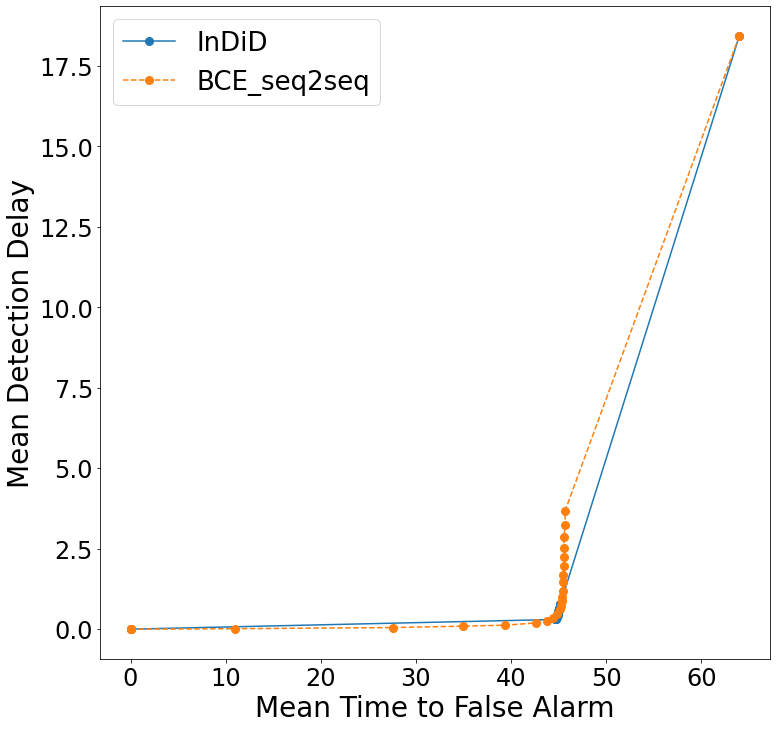

In [60]:
plt.figure(figsize=(12, 12))
#plt.plot(fp_delay_list_zero, delay_list_zero, '-o', markersize=16, label='ZERO')
#plt.plot(fp_delay_list_l2, delay_list_l2, '--o', markersize=8, label='L2')
#plt.plot(fp_delay_list_binseg, delay_list_binseg, '-o', markersize=16, label='BinSeg_pen')
#plt.plot(fp_delay_list_pelt, delay_list_pelt, '-o', markersize=16, label='PELT')
#plt.plot(fp_delay_list_kernel, delay_list_kernel, '-o', markersize=16, label='KernelCPD_pen')
plt.plot(fp_delay_list_cpd, delay_list_cpd, '-o', markersize=8, label='InDiD')
plt.plot(fp_delay_list_bce, delay_list_bce, '--o', markersize=8, label='BCE_seq2seq')
#plt.plot(fp_delay_list_comb, delay_list_comb, '--o', markersize=8, label='Combined')

plt.xlabel('Mean Time to False Alarm', fontsize=28)
plt.ylabel('Mean Detection Delay', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left', fontsize=26);